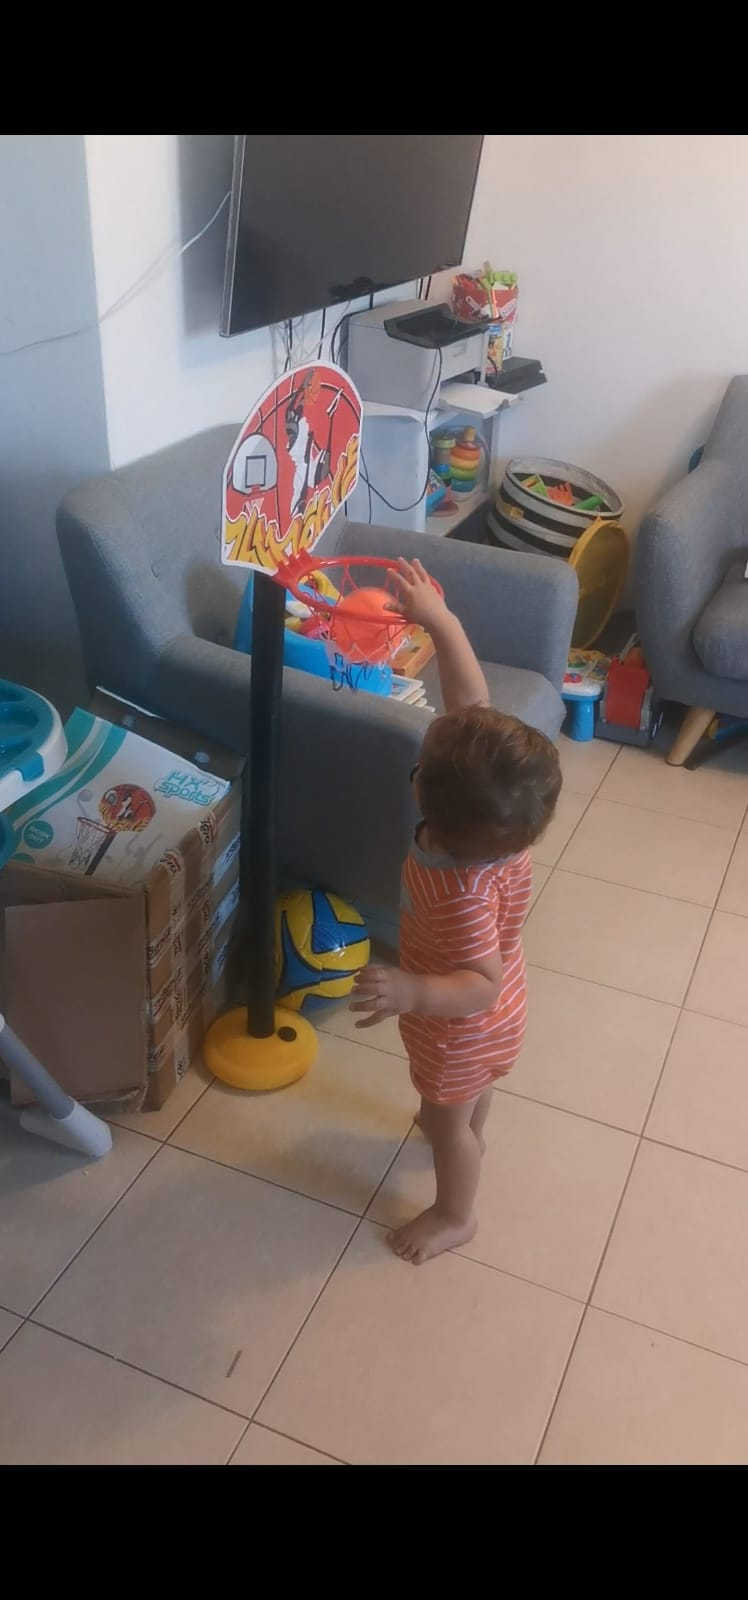

## imports

In [108]:
#imports of the used library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
import seaborn as seabornInstance
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import DictVectorizer
from io import StringIO
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, StratifiedKFold, RandomizedSearchCV

### load of the data

In [109]:
df = pd.read_csv('C:\matala 3\All_seasons.csv')

In [110]:
##Look at the inital Data 
df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,11140,Maxi Kleber,DAL,28.0,208.28,108.862080,None,Germany,Undrafted,Undrafted,...,9.1,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-20
11141,11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,2,...,1.2,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-20
11142,11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,1,...,6.1,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-20
11143,11143,Norvel Pelle,PHI,27.0,208.28,104.779752,None,USA,Undrafted,Undrafted,...,2.1,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-20


In [111]:
#showing the first 5 rows of the data
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


### data information

In [112]:
#Data frame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11145 non-null  int64  
 1   player_name        11145 non-null  object 
 2   team_abbreviation  11145 non-null  object 
 3   age                11145 non-null  float64
 4   player_height      11145 non-null  float64
 5   player_weight      11145 non-null  float64
 6   college            11145 non-null  object 
 7   country            11145 non-null  object 
 8   draft_year         11145 non-null  object 
 9   draft_round        11145 non-null  object 
 10  draft_number       11145 non-null  object 
 11  gp                 11145 non-null  int64  
 12  pts                11145 non-null  float64
 13  reb                11145 non-null  float64
 14  ast                11145 non-null  float64
 15  net_rating         11145 non-null  float64
 16  oreb_pct           111

In [113]:
# numeral information of the data frame 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,11145.0,5572.000000,3217.428709,0.000000,2786.0000,5572.00000,8358.000000,11144.00000
age,11145.0,27.168686,4.344164,18.000000,24.0000,27.00000,30.000000,44.00000
player_height,11145.0,200.812818,9.190973,160.020000,195.5800,200.66000,208.280000,231.14000
player_weight,11145.0,100.637868,12.576295,60.327736,90.7184,99.79024,109.315672,163.29312
gp,11145.0,52.005832,25.069495,1.000000,32.0000,58.00000,74.000000,85.00000
pts,11145.0,8.126487,5.935482,0.000000,3.5000,6.60000,11.500000,36.10000
reb,11145.0,3.560036,2.495394,0.000000,1.8000,3.00000,4.700000,16.30000
ast,11145.0,1.801463,1.789940,0.000000,0.6000,1.20000,2.400000,11.70000
net_rating,11145.0,-2.153899,12.150611,-200.000000,-6.3000,-1.30000,3.200000,300.00000
oreb_pct,11145.0,0.055593,0.043889,0.000000,0.0220,0.04300,0.086000,1.00000


## visualiztion

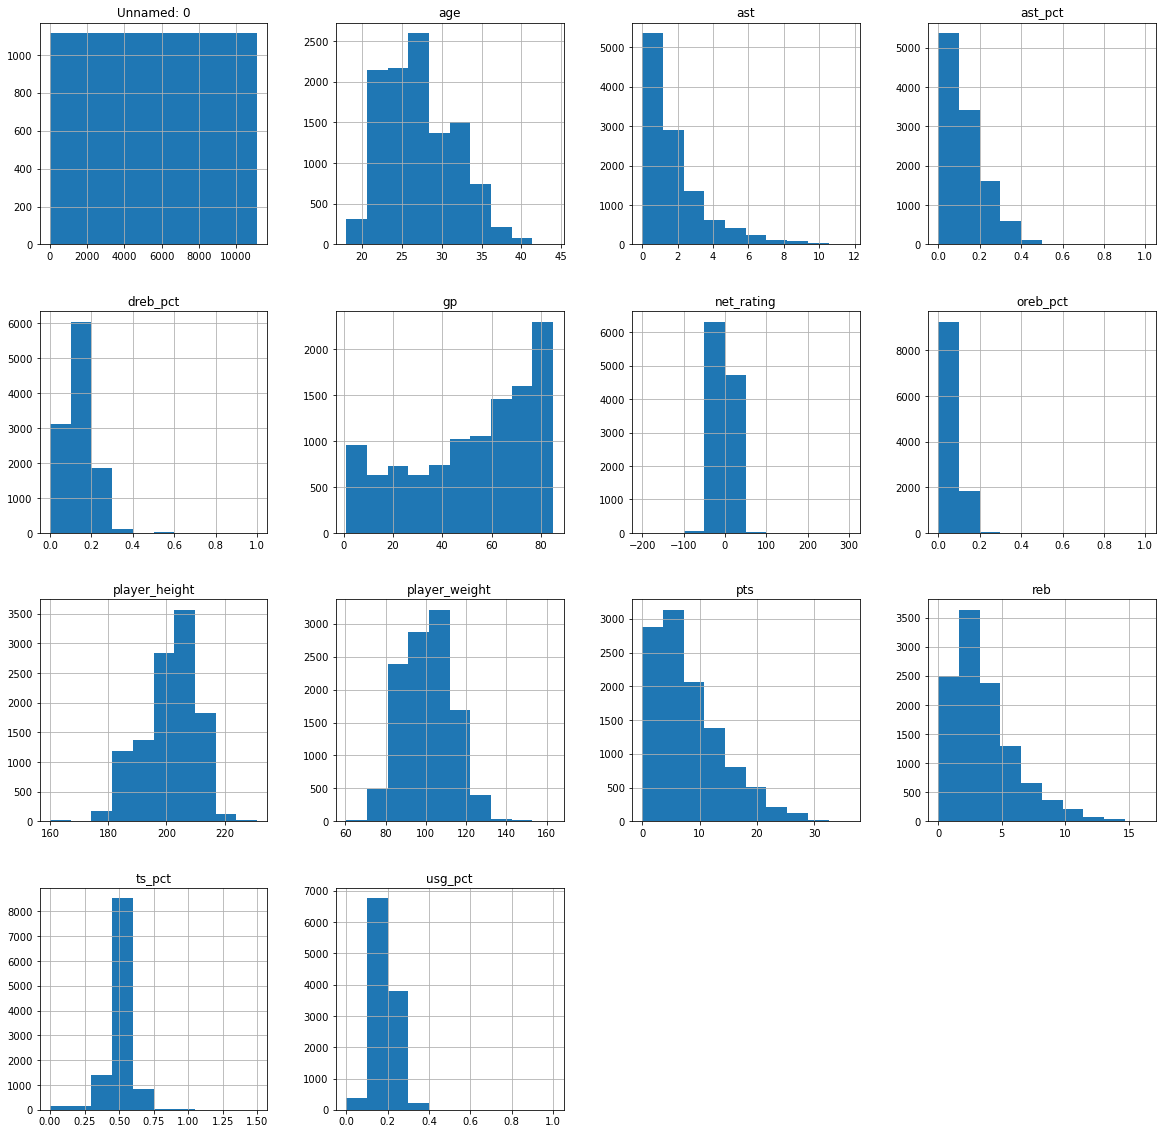

In [114]:
#Take a View of all features to gain insights
df.hist(figsize=(20,20));

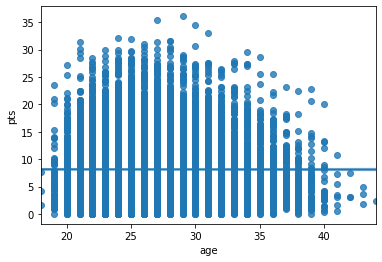

In [115]:
#coraltion plot for Age and Salary
ax=sns.regplot(x='age',y='pts',data=df)

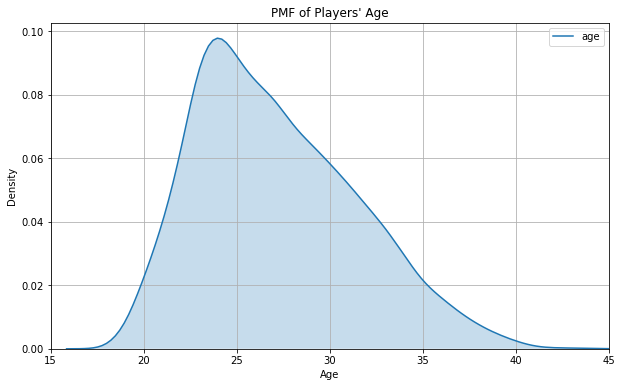

In [116]:
#the dsnsity of the players for age
plt.figure(figsize=(10,6))
sns.kdeplot(df['age'], shade=True)
plt.xlim((15,45))
plt.title("PMF of Players' Age")
plt.ylabel("Density")
plt.xlabel('Age')
plt.grid(True)
plt.show()

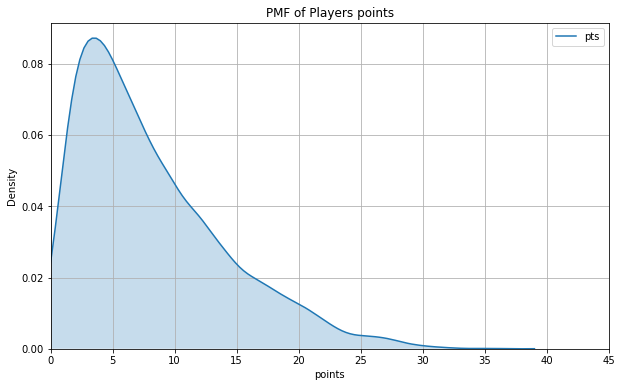

In [117]:
#the dsnsity of the players for points
plt.figure(figsize=(10,6))
sns.kdeplot(df['pts'], shade=True)
plt.xlim((0,45))
plt.title("PMF of Players points")
plt.ylabel("Density")
plt.xlabel('points')
plt.grid(True)
plt.show()

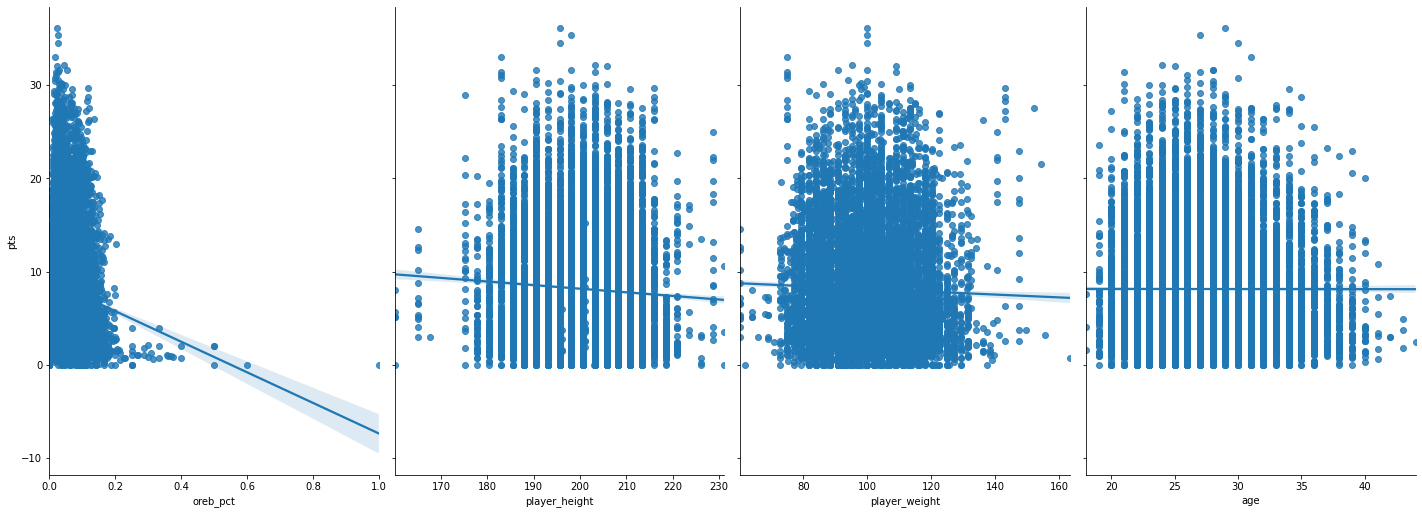

In [118]:
#some coraltion to learn the data for the coraltion with points feature
sns.pairplot(df, x_vars=['oreb_pct','player_height','player_weight','age'], y_vars='pts', height=7, aspect=0.7, kind='reg')

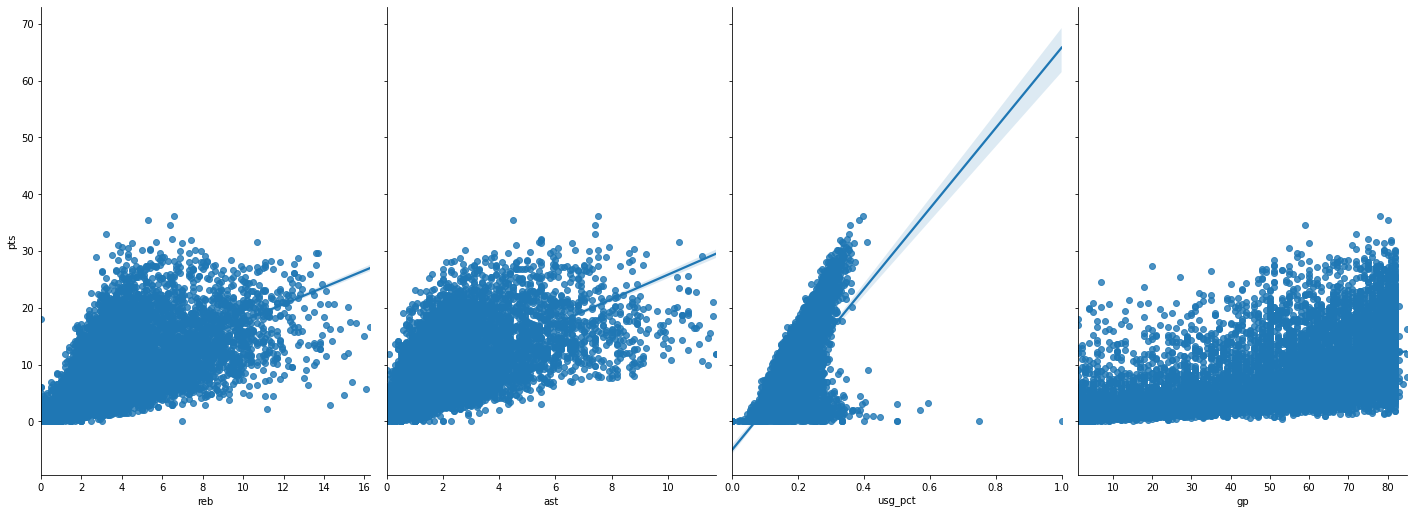

In [119]:
sns.pairplot(df, x_vars=['reb','ast','usg_pct','gp'], y_vars='pts', height=7, aspect=0.7, kind='reg')

### Checking and Cleaning the data

In [120]:
#changing the data from categorial to numeral
rows = df.shape[0]

for row in range(1,rows):

    val = df.loc[row,'country']
    if val=='USA' :
        df.loc[row,'country'] = 0
    else :
        df.loc[row,'country'] = 1
df['country'].value_counts()

0      9409
1      1735
USA       1
Name: country, dtype: int64

In [121]:
#changing the data from NaN to numeral by understanding which data need to be input
rows = df.shape[0]

for row in range(1,rows):

    val = df.loc[row,'draft_number']
    if val=='Undrafted' :
        df.loc[row,'draft_number'] = 100
    else :
        df.loc[row,'draft_number'] = df.loc[row,'draft_number']
        
for row in range(1,rows):

    val = df.loc[row,'draft_round']
    if val=='Undrafted' :
        df.loc[row,'draft_round'] = 3
    else :
        df.loc[row,'draft_round'] = df.loc[row,'draft_round']

In [122]:
#dropping wide data that not helping to find what we search,features like name,index or college name
df.drop(['Unnamed: 0','player_name','team_abbreviation','college','draft_year','season'], inplace = True, axis = 1)

In [123]:
df.drop(df.index[0],inplace=True)

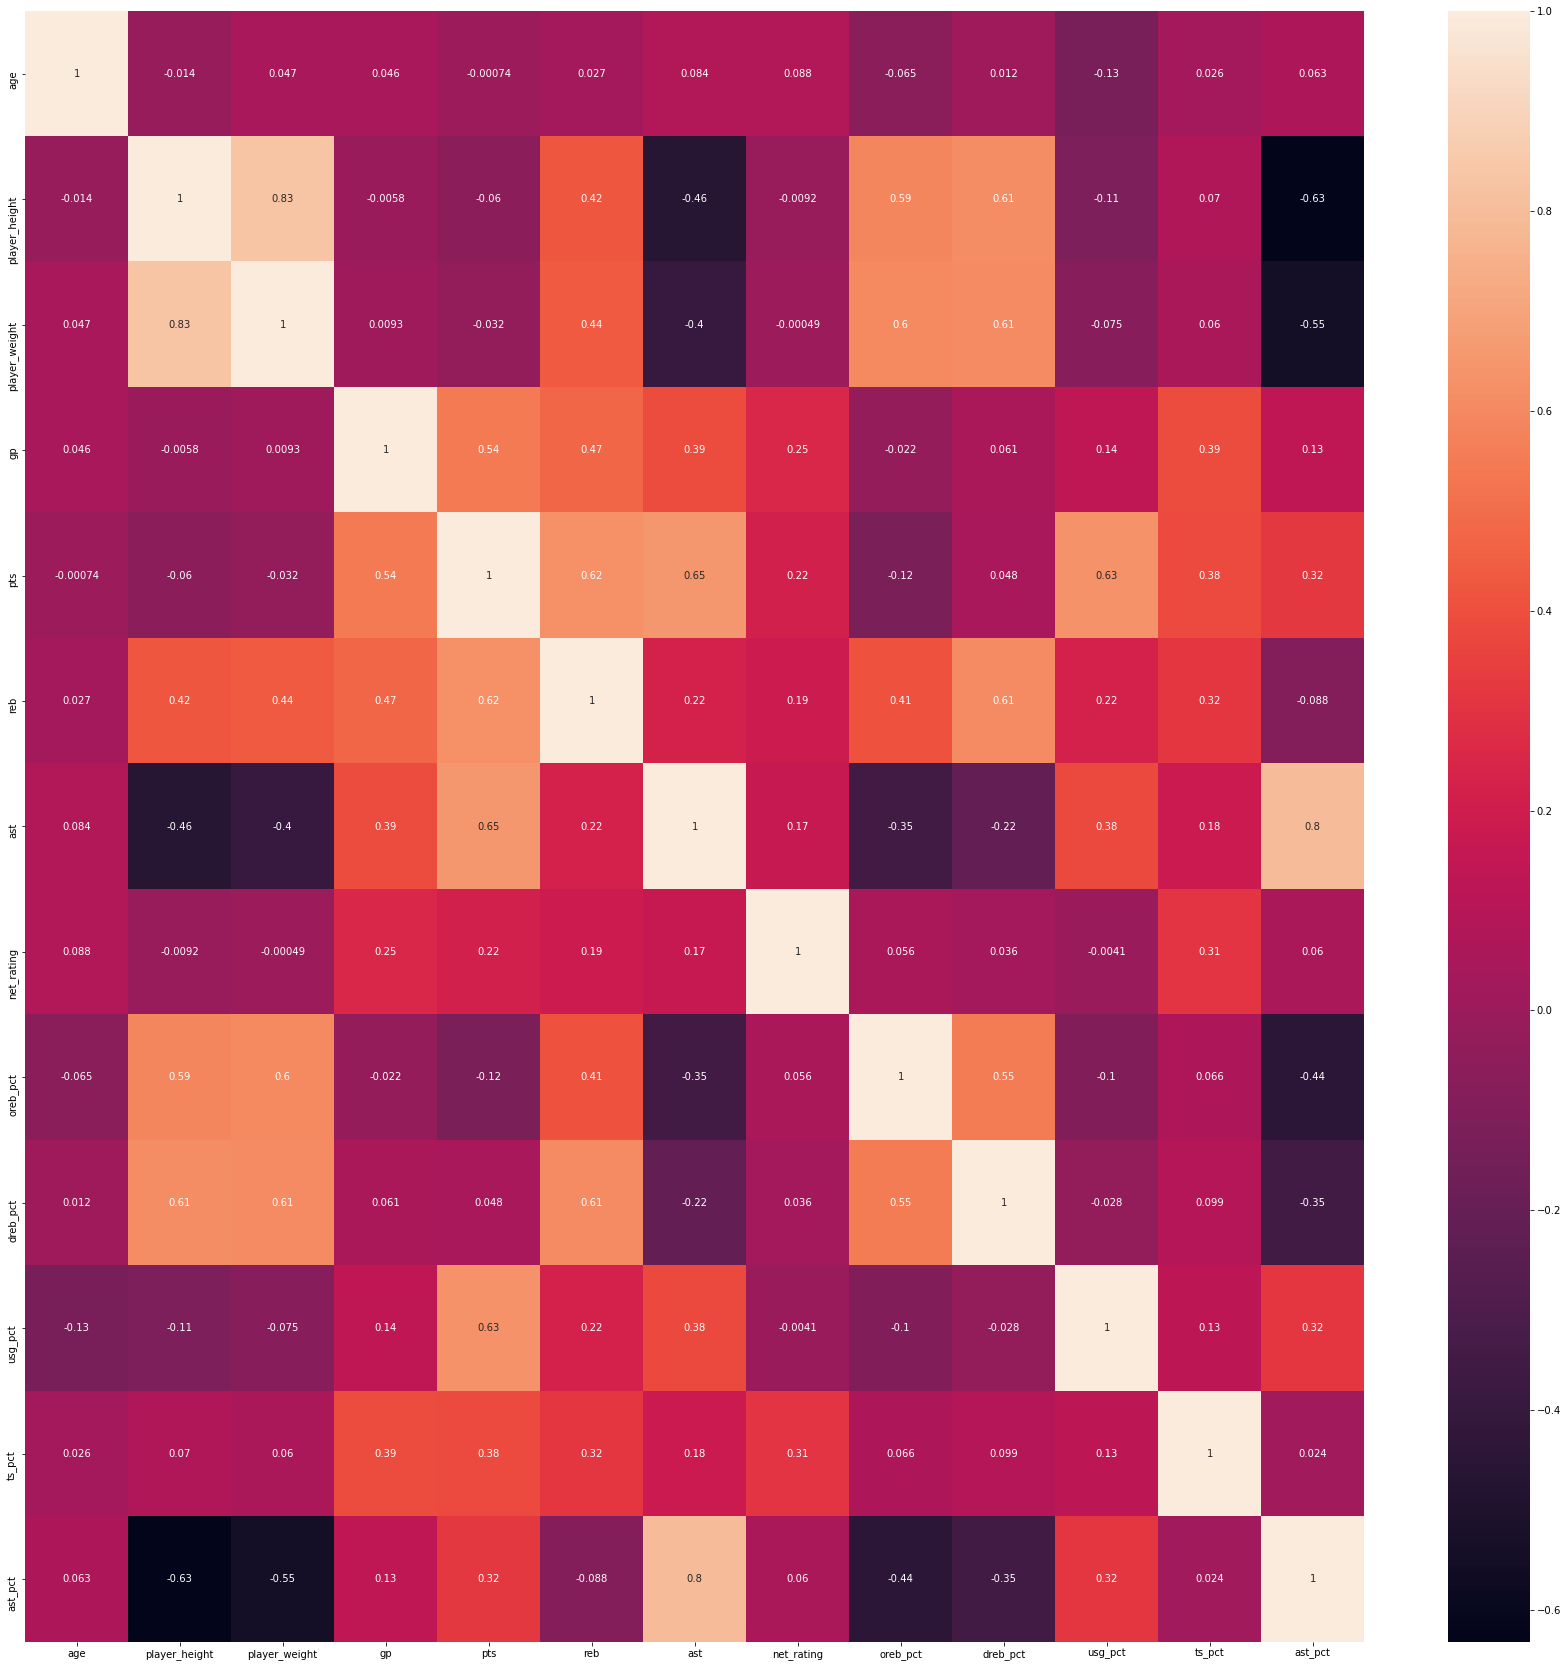

In [124]:
#Heatmap of all features.
cor = df.corr()
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(cor, annot = True)

In [125]:
#checkin for other NaN
df.isnull().values.any()

False

# machine learning model

In [126]:
#define the vectors x\y
X_normal= df.drop(columns=['pts'])
Y_normal = df.iloc[:, 4]
print(X_normal)


        age  player_height  player_weight country draft_round draft_number  \
1      28.0         215.90     117.933920       0           1           24   
2      39.0         205.74      95.254320       0           3           58   
3      24.0         203.20     100.697424       0           1            9   
4      34.0         205.74     108.862080       0           1           10   
5      38.0         200.66      97.522280       0           2           29   
...     ...            ...            ...     ...         ...          ...   
11140  28.0         208.28     108.862080       1           3          100   
11141  23.0         195.58      97.522280       0           2           35   
11142  28.0         213.36     117.933920       0           1           11   
11143  27.0         208.28     104.779752       0           3          100   
11144  25.0         193.04      86.182480       0           3          100   

       gp  reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  t

In [127]:
print(Y_normal)

1        1
2        3
3        1
4        1
5        2
        ..
11140    3
11141    2
11142    1
11143    3
11144    3
Name: draft_round, Length: 11144, dtype: object


### scaling the data 

In [128]:
#Standardize features by removing the mean and scaling to unit variance
#StandardScaler Reducing each columns to gauss
scale = StandardScaler()
dfxy = pd.DataFrame(scale.fit_transform(df.values), columns=df.columns, index=df.index)

In [146]:
#checking the results of the scaling
x= dfxy.drop(columns=['pts'])
y = dfxy.iloc[:, 7]
print(x)

            age  player_height  player_weight   country  draft_round  \
1      0.191581       1.641502       1.375284 -0.429416    -0.755539   
2      2.724184       0.536065      -0.428077 -0.429416     1.761193   
3     -0.729365       0.259706       0.004730 -0.429416    -0.755539   
4      1.573001       0.536065       0.653940 -0.429416    -0.755539   
5      2.493948      -0.016653      -0.247741 -0.429416     0.502827   
...         ...            ...            ...       ...          ...   
11140  0.191581       0.812424       0.653940  2.328745     1.761193   
11141 -0.959602      -0.569372      -0.247741 -0.429416     0.502827   
11142  0.191581       1.365142       1.375284 -0.429416    -0.755539   
11143 -0.038655       0.812424       0.329335 -0.429416     1.761193   
11144 -0.499128      -0.845731      -1.149422 -0.429416     1.761193   

       draft_number        gp       reb       ast  net_rating  oreb_pct  \
1         -0.346126 -1.476120 -0.826021 -0.838789    1.18981

In [147]:
print(y)

1       -0.981681
2       -1.234400
3       -0.745809
4       -0.964833
5        0.012349
           ...   
11140    0.163980
11141   -1.167008
11142   -0.341458
11143   -1.015377
11144   -0.611026
Name: pts, Length: 11144, dtype: float64


In [148]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25, random_state=42)

In [149]:
print(x_train.shape)
print(y_train.shape)

(8358, 15)
(8358,)


In [150]:
print(x_test.shape)
print(y_test.shape)

(2786, 15)
(2786,)


In [154]:
linreg=LinearRegression(fit_intercept = True)
reg=linreg.fit(x_train, y_train)

In [155]:
reg.score(x_train, y_train)

0.8759670683566925

In [156]:
reg.score(x_test, y_test)

0.8637648265280247

In [160]:
y_pred=reg.predict(x_test)
y_test=np.array(y_test)
dnormalized_pred=(y_pred)*(y.std())+(y.mean())
dnormalized_test=(y_test)*(y.std())+(y.mean())
delta_y=dnormalized_pred-dnormalized_test
print(delta_y)

[ 0.0380196   0.56833182 -0.02197913 ...  0.47328492  0.87015099
  0.02308207]


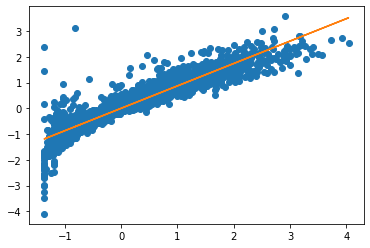

In [161]:
plt.plot(dnormalized_test, dnormalized_pred, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(dnormalized_test, dnormalized_pred, 1)

#add linear regression line to scatterplot 
plt.plot(dnormalized_test, m*dnormalized_test+b)

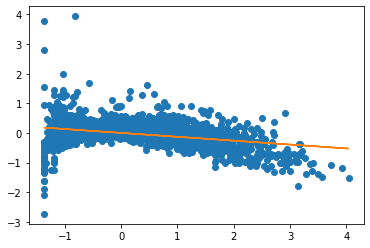

In [162]:
plt.plot(dnormalized_test, delta_y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(dnormalized_test, delta_y, 1)

#add linear regression line to scatterplot 
plt.plot(dnormalized_test, m*dnormalized_test+b)

In [ ]:
degrees = [2, 3, 4, 5, 6] # Change degree "hyperparameter" here
normalizes = [True, False] # Change normalize hyperparameter here
best_score = 0
best_degree = 0
for degree in degrees:
    for normalize in normalizes:
        poly_features = PolynomialFeatures(degree = degree)
        x_train_poly = poly_features.fit_transform(x_train)
        polynomial_regressor = LinearRegression(normalize=normalize)
        polynomial_regressor.fit(x_train_poly, y_train)
        scores = cross_val_score(polynomial_regressor, x_train_poly, y_train, cv=5) # Change k-fold cv value here
        if max(scores) > best_score:
            best_score = max(scores)
            best_degree = degree
            best_normalize = normalize

In [504]:
print(best_score)

0.4977298346610659

In [505]:
print(reg.intercept_)
print(reg.coef_)

0.866125201857341

In [506]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('square root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Best Score:  -0.12802850565035798
Best Params:  {'alpha': 15}


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.6s finished


In [527]:
dm = DummyRegressor(strategy="mean")
dm.fit(X_train, y_train)
y_predm =dm.predict(X_test)
print("Mean Squared Error of dummy: {}".format(metrics.mean_squared_error(y_test,dm.predict(X_test), squared=False)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predm))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predm))

[ 0.17231679  1.85035934 -0.4632949  ...  1.25848292  1.06436319
 -0.43690055]


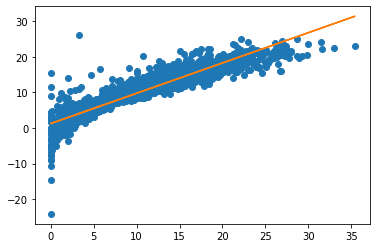

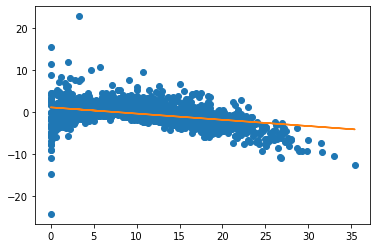

In [509]:
plt.plot(dnormalized_test, delta_y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(dnormalized_test, delta_y, 1)

#add linear regression line to scatterplot 
plt.plot(dnormalized_test, m*dnormalized_test+b)

In [510]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score 
degrees = [2, 3, 4, 5, 6] # Change degree "hyperparameter" here
normalizes = [True, False] # Change normalize hyperparameter here
best_score = 0
best_degree = 0
for degree in degrees:
    for normalize in normalizes:
        poly_features = PolynomialFeatures(degree = degree)
        x_train_poly = poly_features.fit_transform(x_train)
        polynomial_regressor = LinearRegression(normalize=normalize)
        polynomial_regressor.fit(x_train_poly, y_train)
        scores = cross_val_score(polynomial_regressor, x_train_poly, y_train, cv=5) # Change k-fold cv value here
        if max(scores) > best_score:
            best_score = max(scores)
            best_degree = degree
            best_normalize = normalize

In [511]:
print(best_score)

0.9883358278787673


-0.0014780904569061185
[-0.00147357  0.0141938  -0.00176693  0.06477799  0.52168325  0.4686215
  0.02735543 -0.17546246 -0.17350536  0.37743605  0.0862566  -0.27416591]


In [516]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('square root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2370230695322702
Mean Squared Error: 0.13536097900218017
square root Mean Squared Error: 0.3679143636801643


In [517]:
dm = DummyRegressor(strategy="mean")
dm.fit(X_train, y_train)
y_predm =dm.predict(X_test)
print("Mean Squared Error of dummy: {}".format(metrics.mean_squared_error(y_test,dm.predict(X_test), squared=False)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predm))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predm))

Mean Squared Error of dummy: 1.0065600455915562
Mean Absolute Error: 0.7915030338367228
Mean Squared Error: 1.0131631253812758


-0.0014780904569061185
[-0.00147357  0.0141938  -0.00176693  0.06477799  0.52168325  0.4686215
  0.02735543 -0.17546246 -0.17350536  0.37743605  0.0862566  -0.27416591]


[('age', -0.0014735675541173363),
 ('player_height', 0.014193795961919012),
 ('player_weight', -0.001766930103048503),
 ('gp', 0.06477798907270783),
 ('reb', 0.5216832514556233),
 ('ast', 0.4686214997236446),
 ('net_rating', 0.02735542955226261),
 ('oreb_pct', -0.1754624617114575),
 ('dreb_pct', -0.17350535553228366),
 ('usg_pct', 0.37743605266228214),
 ('ts_pct', 0.08625660405344791),
 ('ast_pct', -0.2741659147598626)]

Mean Absolute Error: 0.2370230695322702
Mean Squared Error: 0.13536097900218017
square root Mean Squared Error: 0.3679143636801643


Mean Squared Error of dummy: 1.0065600455915562
Mean Absolute Error: 0.7915030338367228
Mean Squared Error: 1.0131631253812758
